# Deseasonalize Times Series

(Sourced from: https://www.machinelearningplus.com/time-series/time-series-analysis-python/)

Deseasonalizing a time series means to remove the seasonality component from a time series.

Approaches:

- take a moving average with length as the seasonal window (this will smoothen the series).
- seasonal difference the time series (subtract the value of the previous season from the current value)
- divide the series by the seasonal index obtained from STL decomposition (seasonal and trend decomposition using Loess). If dividing by the seasonal index does not work well, try taking a log of the series and then do the deseasonalizing. You can later restore to the original scale by taking an exponential.



## Division by seasonal index

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load data
url = "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv"
df = pd.read_csv(url, parse_dates=["date"], index_col="date")
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [3]:
# time series decomposition
multi_decomp = seasonal_decompose(df.loc[:, "value"], model="multiplicative", extrapolate_trend="freq")
multi_decomp.seasonal

date
1991-07-01    0.987845
1991-08-01    0.990481
1991-09-01    0.987476
1991-10-01    1.048329
1991-11-01    1.074527
                ...   
2008-02-01    0.785976
2008-03-01    0.868249
2008-04-01    0.861883
2008-05-01    0.931613
2008-06-01    0.907423
Name: value, Length: 204, dtype: float64

In [4]:
# deseasonalize
deseasonalized_series = df.loc[:, "value"] / multi_decomp.seasonal
deseasonalized_series

date
1991-07-01     3.569985
1991-08-01     3.211461
1991-09-01     3.293470
1991-10-01     3.444533
1991-11-01     3.318548
                ...    
2008-02-01    27.550814
2008-03-01    21.036534
2008-04-01    26.810702
2008-05-01    24.594452
2008-06-01    21.414195
Name: value, Length: 204, dtype: float64

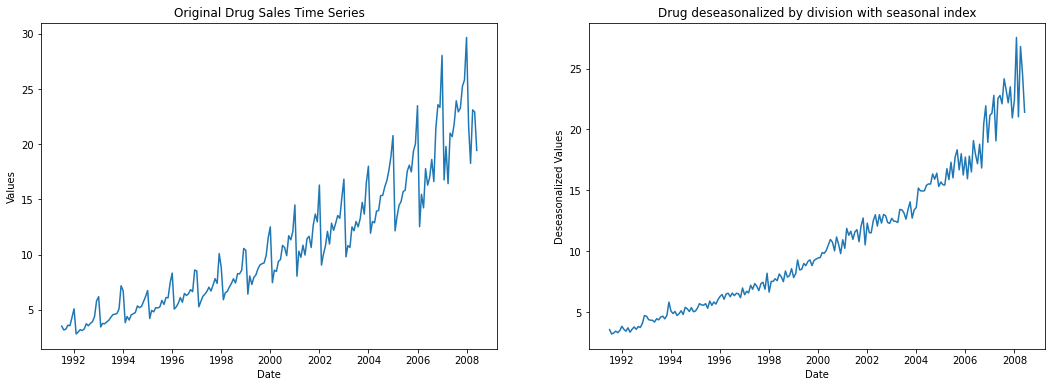

In [5]:
# plot original next to deseasonalized time series
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].set_title("Original Drug Sales Time Series")
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Values')
axes[0].plot(df.index, df.loc[:, "value"])

axes[1].set_title("Drug deseasonalized by division with seasonal index")
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Deseasonalized Values')
axes[1].plot(df.index, deseasonalized_series)

plt.show()